In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.0, high = 90.0, size = 1500)
lngs = np.random.uniform(low = -180.0, high = 180.0, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Import citipy

from citipy import citipy

In [5]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [6]:
# Import the requests library

import requests

# Import the API key

from config import weather_api_key

# Import the time library and the datetime module from the datetime library

import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&"

In [8]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_to_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %h:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_to_date})

# If an error is experienced, skip the city
    except BaseException as e:
        print("City not found. Skipping...")
        print(e)
        pass

# Indicate that Data Loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | san matias
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | bulgan
Processing Record 8 of Set 1 | khani
Processing Record 9 of Set 1 | abu samrah
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | altukhovo
Processing Record 16 of Set 1 | morgan city
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
'coord'
Processing Record 20 of Set 1 | imbituba
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | barra da e

Processing Record 34 of Set 4 | los llanos de aridane
Processing Record 35 of Set 4 | jalu
Processing Record 36 of Set 4 | san luis
Processing Record 37 of Set 4 | snezhnogorsk
Processing Record 38 of Set 4 | bloemfontein
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | bandar-e lengeh
Processing Record 43 of Set 4 | iranshahr
Processing Record 44 of Set 4 | palafrugell
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | cody
Processing Record 48 of Set 4 | buchanan
Processing Record 49 of Set 4 | polyarnyy
Processing Record 50 of Set 4 | mehamn
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | trincomalee
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | chingirlau
Processing Record 6 of Set 5 | te anau
Processing Record 7 of Set 5 |

Processing Record 25 of Set 8 | smithers
Processing Record 26 of Set 8 | taoudenni
Processing Record 27 of Set 8 | kumo
Processing Record 28 of Set 8 | vestmannaeyjar
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | samalaeulu
City not found. Skipping...
'coord'
Processing Record 31 of Set 8 | high rock
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | algete
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | shache
Processing Record 36 of Set 8 | mets parni
Processing Record 37 of Set 8 | kariba
Processing Record 38 of Set 8 | salinopolis
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | avesta
Processing Record 41 of Set 8 | itoman
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | tiarei
Processing Record 44 of Set 8 | castro
Processing Record 45 of Set 8 | sturgis
Processing Record 46 of Set 8 | aguimes
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 

Processing Record 13 of Set 12 | bivolari
Processing Record 14 of Set 12 | kardymovo
Processing Record 15 of Set 12 | aflu
City not found. Skipping...
'coord'
Processing Record 16 of Set 12 | novaya lyalya
Processing Record 17 of Set 12 | mahibadhoo
Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | asfi
Processing Record 20 of Set 12 | kenosha
Processing Record 21 of Set 12 | saint anthony
Processing Record 22 of Set 12 | othonoi
City not found. Skipping...
'coord'
Processing Record 23 of Set 12 | altinho
Processing Record 24 of Set 12 | cockburn town
Processing Record 25 of Set 12 | sobolevo
Processing Record 26 of Set 12 | fuxin
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | oistins
Processing Record 29 of Set 12 | tautira
Processing Record 30 of Set 12 | qandala
Processing Record 31 of Set 12 | wahiawa
Processing Record 32 of Set 12 | baherden
Processing Record 33 of Set 12 | kapoeta
Processing Record 34 of Set 12 | jumla
Processi

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
new_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-05-20 May:15:22,-9.8000,-139.0333,77.72,67,0,10.18
1,San Matias,BO,2022-05-20 May:15:23,-16.3667,-58.4000,61.27,46,44,3.24
2,Hobart,AU,2022-05-20 May:15:15,-42.8794,147.3294,45.27,92,75,9.22
3,Hermanus,ZA,2022-05-20 May:15:23,-34.4187,19.2345,58.23,67,67,1.61
4,Cape Town,ZA,2022-05-20 May:15:04,-33.9258,18.4232,55.90,82,20,4.61
...,...,...,...,...,...,...,...,...,...
565,Bien Hoa,VN,2022-05-20 May:30:10,10.9500,106.8167,80.58,83,100,1.05
566,Kanungu,UG,2022-05-20 May:30:10,-0.9575,29.7897,61.02,89,100,4.09
567,Sinop,TR,2022-05-20 May:30:11,41.7711,34.8709,46.74,73,1,9.24
568,Gondanglegi,ID,2022-05-20 May:30:11,-7.7479,112.0132,75.52,90,98,2.10


In [10]:
# Create the output file
output_data_file = "weather_data/cities.csv"

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

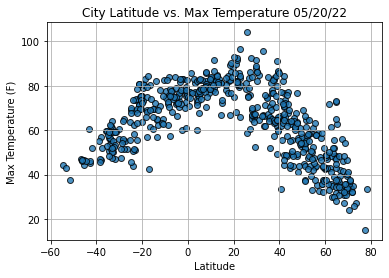

In [12]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

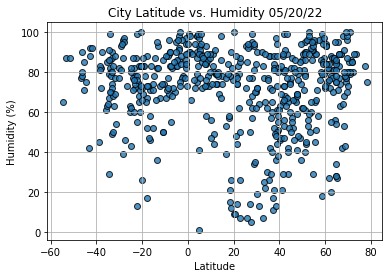

In [13]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

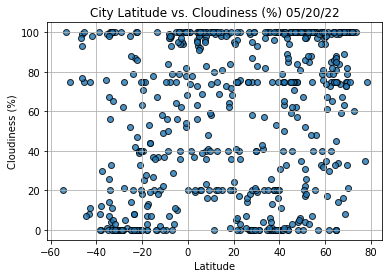

In [14]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

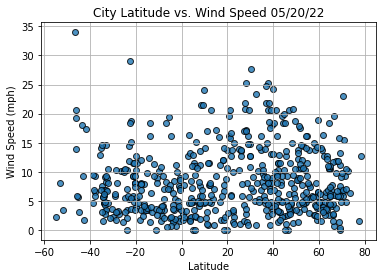

In [15]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                       Rikitea
Country                         PF
Date          2022-05-20 May:15:25
Lat                       -23.1203
Lng                      -134.9692
Max Temp                     73.56
Humidity                        78
Cloudiness                      87
Wind Speed                    5.28
Name: 13, dtype: object

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

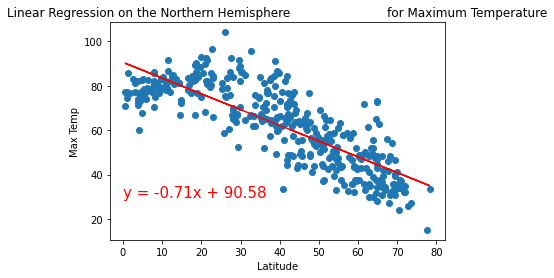

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,30))

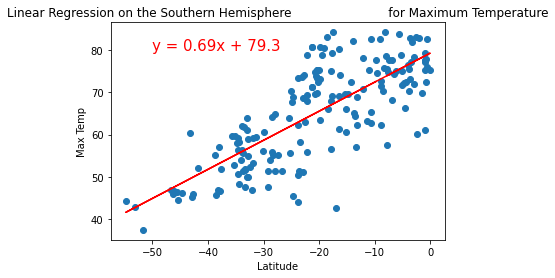

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

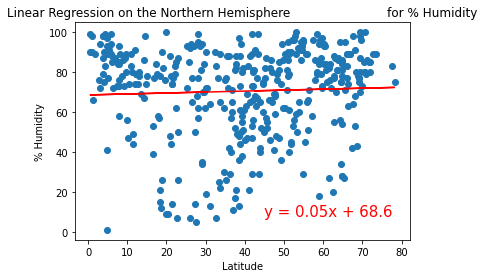

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,8))

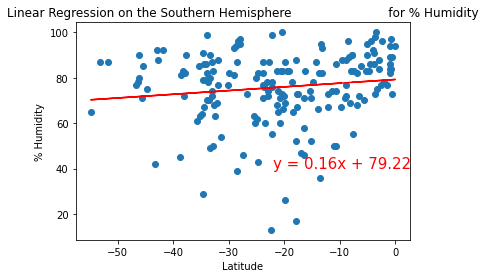

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-22,40))

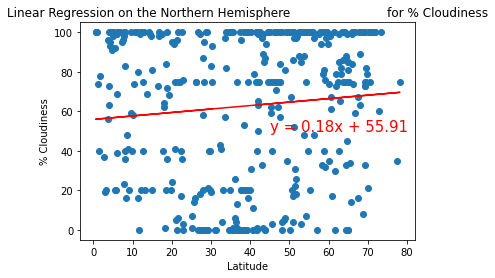

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,50))

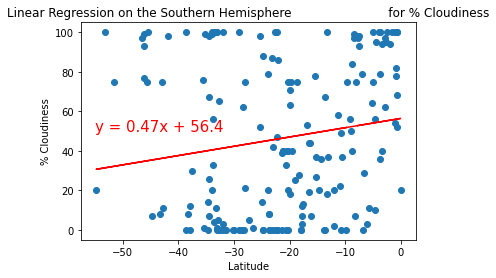

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

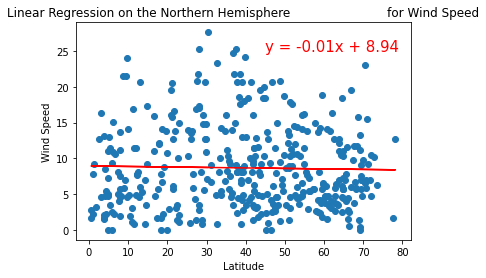

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,25))

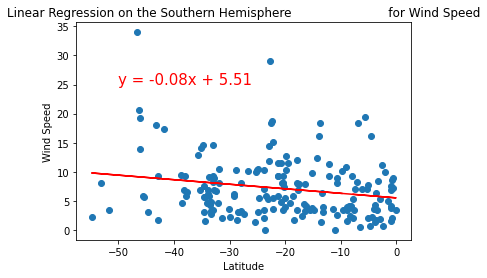

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))